# Preprocess

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

scaler = StandardScaler()

In [2]:
data = pd.read_csv('./cars.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales in Thousands      100 non-null    float64
 1   Year Resale Value       100 non-null    float64
 2   Price in Thousands      100 non-null    float64
 3   Engine Size             100 non-null    float64
 4   Horsepower              100 non-null    int64  
 5   Wheelbase               100 non-null    float64
 6   Width                   100 non-null    float64
 7   Length                  100 non-null    float64
 8   Curb Weight             100 non-null    float64
 9   Fuel Capacity           100 non-null    float64
 10  Fuel Efficiency         100 non-null    int64  
 11  Power Perf Factor       100 non-null    float64
 12  Vehicle Type Car        100 non-null    int64  
 13  Vehicle Type Passenger  100 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 11.1

# Gradient Decsent 

$$\theta_{i+1} = \theta_{i} - \alpha \nabla J(\theta_{i})$$

where:
- $\theta_{i+1}$: represents the updated parameter vector at iteration $i + 1$
- $\theta_{i}$: represents the parameter vector at iteration $i$
- $\alpha$: represents the learning rate (step size)
- $\nabla J(\theta_{i})$: represents the gradient vector of the cost function $J$ with respect to the parameters $\theta$ at iteration $i$

Used loss function: Mean Square Error

$$ \text{MSE} = \frac{1}{2 \times n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:

- n: number of samples
- $y_i$: represents the true (target) value for the $i$-th sample
- $\hat{y_i}$: represents the predicted value for the $i$-th sample

### Utilities

In [3]:
class MultivariateLinearRegression():
    def __init__(self, learning_rate = 0.1, n_iter = 1000) -> None:
        self.lr = learning_rate
        self.n_iter = n_iter
    
    def _reset_history(self):
        self.history = {
            'loss': [],
            'r2': []
        }
        
    # n = observes
    # m = features 
    # shape y = (n, 1)
    # shape w = (1, m)
    # shape x = (n, m)
    def fit(self, x: np.ndarray, y: np.ndarray):
        self._reset_history()

        self.n = x.shape[0]
        self.m = x.shape[1]
        
        self.w = np.zeros(shape=(1, self.m))
        self.b = 0

        for _ in range(self.n_iter):
            y_pred = self.predict(x)
            l = self._loss(y_pred, y)
            self.history['loss'].append(l)
            self.history['r2'].append(r2_score(y, y_pred))
            self._update(x, y_pred, y)

    def _loss(self, y_true: np.ndarray, y_pred: np.ndarray):
        return (0.5 / self.n) * np.sum((y_pred - y_true) ** 2)
    
    def predict(self, x:np.ndarray):
        y = (self.w @ x.T) + self.b
        return y.T
    
    def _update(self, x:np.ndarray, y_pred: np.ndarray, y_true: np.ndarray):
        db = (1 / self.n) * np.sum(y_pred - y_true)
        dw = (1 / self.n) * np.sum((y_pred - y_true) * x, axis=0).reshape(self.w.shape)

        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
    
    def coef_(self):
        return self.w
    def intercept_(self):
        return self.b

In [4]:
def get_x_y(data, target):
    x = data.drop(columns=[target], axis=1).to_numpy()
    y = data[target].to_numpy().reshape(-1, 1)

    return x, y

In [5]:
def plot_learning_curves(model):
    epochs = model.n_iter
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))
    axes[0].plot(
        range(1, 101),
        model.history['loss'][:100],
    )
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('loss')
    axes[0].hlines(y = 0, linestyles='dashed', xmin=0, xmax=100, alpha = 0.5, colors='black')

    axes[0].set_title('Learning curves')

    axes[1].plot(
        range(1 , 101),
        model.history['r2'][:100]
    )
    axes[1].set_xlabel('epoch')
    axes[1].set_ylabel('r2')
    axes[1].set_ylim((-10, 2))
    axes[1].hlines(y = 1, linestyles='dashed', xmin=0, xmax=100, alpha = 0.5, colors='black')

    plt.tight_layout()
    plt.show()


def plot_visual_comparison(y_true, y_pred):
    x_axis = range(1, len(y_true) + 1)

    fig = plt.figure(figsize=(9, 6))
    sea.pointplot(
        x = x_axis,
        y = y_true.flatten(),
        label = 'actual'
    )
    sea.pointplot(
        x = x_axis,
        y = y_pred.flatten(),
        label = 'predicted'
    )
    plt.title('Comparison of Actual and Predicted Values')
    plt.show()


In [6]:
def learn_a_model(data, target, test_size, model, random_state, verbose):
    x, y = get_x_y(data, target)

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(x=X_train, y=y_train)
    y_pred = model.predict(X_test)
    
    if(verbose):
        print('R2-score train:', r2_score(y_train, model.predict(X_train)))
        print('R2-score test:', r2_score(y_test, y_pred))
        plot_visual_comparison(y_test, y_pred)
        plot_learning_curves(model)

    return model

## Price In Thousand

### Gradient descent - Learning Curves and Visual Comparison

R2-score train: 0.9265070104235185
R2-score test: 0.9226158079875545


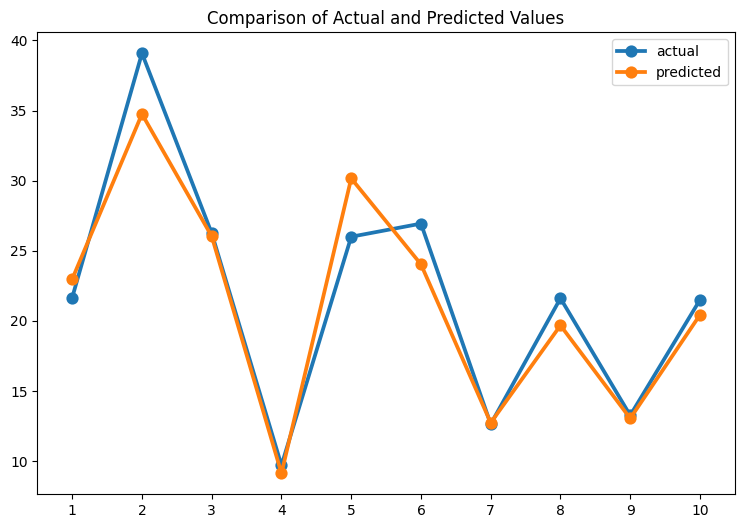

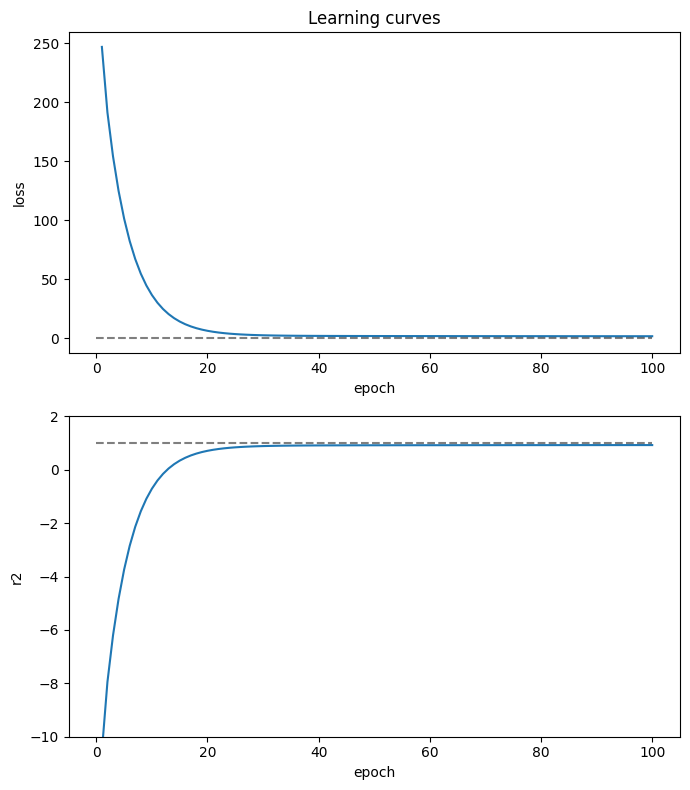

In [7]:
learn_a_model(
    data = data,
    target = 'Price in Thousands',
    test_size = 0.1,
    model = MultivariateLinearRegression(learning_rate = 0.1, n_iter = 100),
    random_state = 42,
    verbose=True
);


### Robustness Through Different Random States

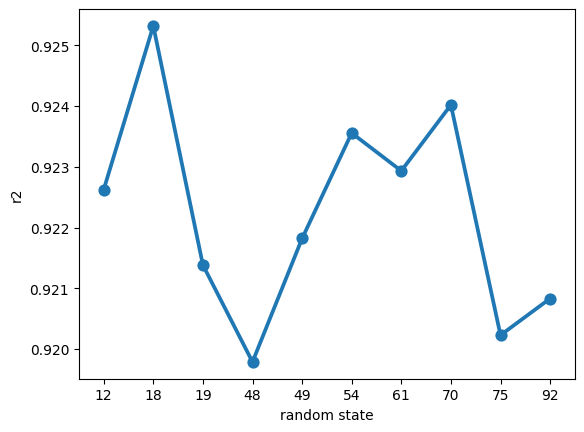

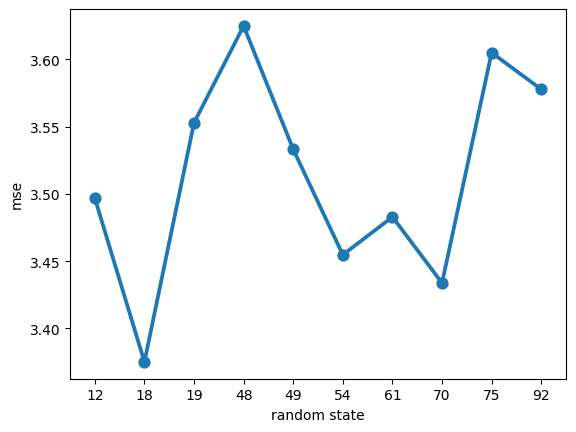

In [8]:
random_states = np.random.randint(low = 1, high = 100, size = (10,))
r2s = []
mses = []
for random_state in random_states:
    model = learn_a_model(
        data = data,
        target = 'Price in Thousands',
        test_size = 0.1,
        model = MultivariateLinearRegression(learning_rate = 0.1, n_iter = 100),
        random_state = random_state,
        verbose = False
    )
    x, y = get_x_y(data,'Price in Thousands')
    mse = mean_squared_error(y, model.predict(scaler.fit_transform(x)))
    r2 = r2_score(y, model.predict(scaler.fit_transform(x))) 
    r2s.append(r2)
    mses.append(mse)

sea.pointplot(x = random_states, y = r2s)
plt.xlabel('random state')
plt.ylabel('r2')
plt.show()
sea.pointplot(x = random_states, y = mses)
plt.xlabel('random state')
plt.ylabel('mse')
plt.show()

## Horsepower

### Gradient descent - Learning Curves and Visual Comparison

R2-score train: 0.9834335042917761
R2-score test: 0.9898750466244336


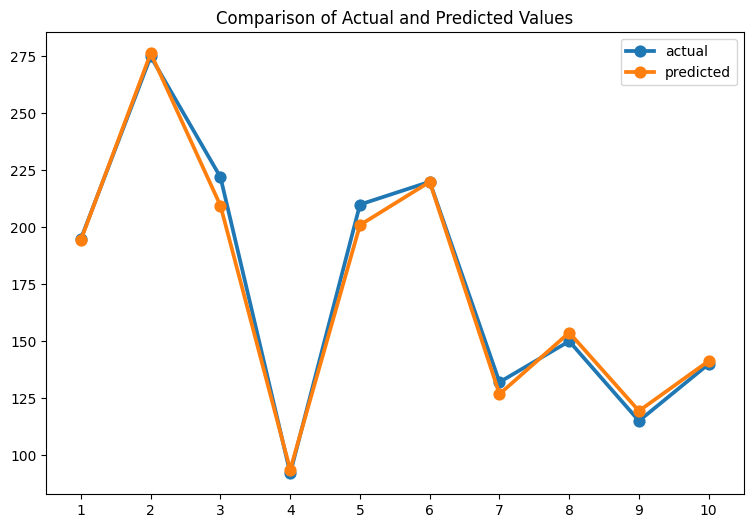

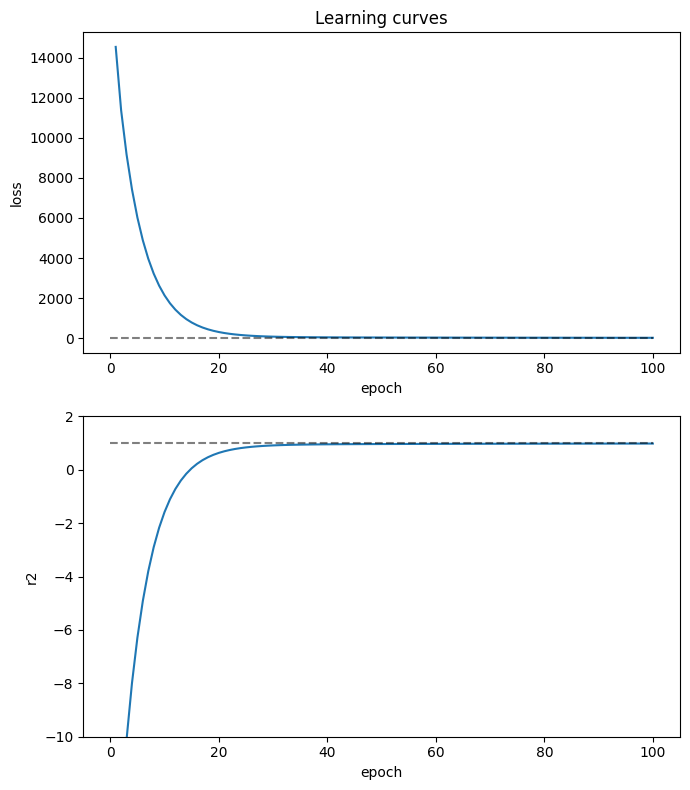

In [9]:
hp_model = learn_a_model(
    data = data,
    target = 'Horsepower',
    test_size = 0.1,
    model = MultivariateLinearRegression(learning_rate = 0.1, n_iter = 100),
    random_state = 42,
    verbose=True
)


### Robustness Through Different Random States

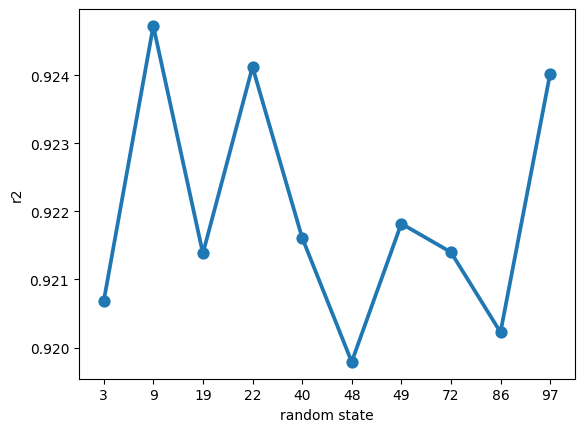

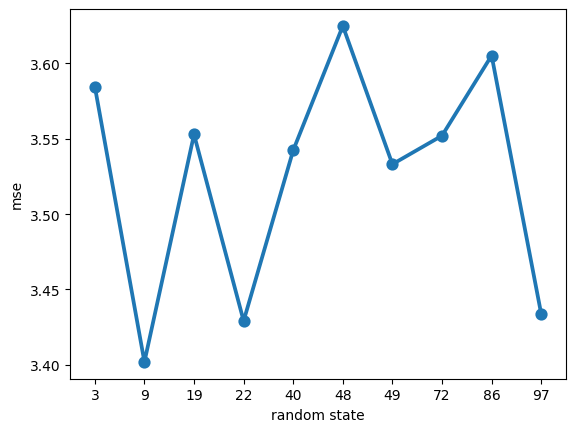

In [10]:
random_states = np.random.randint(low = 1, high = 100, size = (10,))
r2s = []
mses = []
for random_state in random_states:
    model = learn_a_model(
        data = data,
        target = 'Price in Thousands',
        test_size = 0.1,
        model = MultivariateLinearRegression(learning_rate = 0.1, n_iter = 100),
        random_state = random_state,
        verbose = False
    )
    x, y = get_x_y(data,'Price in Thousands')
    mse = mean_squared_error(y, model.predict(scaler.fit_transform(x)))
    r2 = r2_score(y, model.predict(scaler.fit_transform(x))) 
    r2s.append(r2)
    mses.append(mse)

sea.pointplot(x = random_states, y = r2s)
plt.xlabel('random state')
plt.ylabel('r2')
plt.show()
sea.pointplot(x = random_states, y = mses)
plt.xlabel('random state')
plt.ylabel('mse')
plt.show()

# K-fold Cross Validation

K-fold cross-validation is a technique used in machine learning to assess the performance and generalization ability of a model. It involves splitting the available data into K equally sized folds or subsets.

The process can be summarized as follows:

1. The data is partitioned into K subsets or folds of approximately equal size.

2. The model is trained and evaluated K times, with each iteration using a different fold as the validation set and the remaining K-1 folds as the training set.

3. For each iteration, the model is trained on the training set and evaluated on the validation set.

4. The performance metrics (e.g., accuracy, error rate) from each iteration are averaged to obtain an overall performance measure.

## Utilities

In [11]:
class KfoldCrossValidation():
    def __init__(self, k, model) -> None:
        self.k = k
        self.model = model
        self.metrics = {
            'loss': [],
            'r2': []
        }

    def evaluate(self, x, y):
        n = len(x)
        shuffle = np.random.permutation(n)
        x = x[shuffle]
        y = y[shuffle]

        fold_size = n // self.k
        
        for i in range(self.k):
            if(i == self.k - 1):
                xtrain = x[: fold_size * i]
                ytrain = y[: fold_size * i]
                xtest = x[fold_size * i :]
                ytest = y[fold_size * i :]
            else:
                xtrain = np.concatenate([
                    x[: fold_size * i],
                    x[fold_size * (i + 1) :],
                    ], axis=0)
                ytrain = np.concatenate([
                    y[: fold_size * i],
                    y[fold_size * (i + 1) :],
                    ], axis=0) 
                
                xtest = x[fold_size * i : fold_size * (i + 1)]
                ytest = y[fold_size * i : fold_size * (i + 1)]

            self.model.fit(xtrain, ytrain)
            ypred = self.model.predict(xtest)
            self.metrics['loss'].append(mean_squared_error(ytest, ypred))
            self.metrics['r2'].append(r2_score(ytest, ypred))

    def show_metrics(self):
        for i in range(self.k):
            print(f'fold number {i + 1}:')
            print(f"loss: {self.metrics['loss'][i]:.2f} - r2: {self.metrics['r2'][i]:.2f}")
            print('------------------------')


In [12]:
kfold = KfoldCrossValidation(k = 5, model=MultivariateLinearRegression(learning_rate=0.1, n_iter=100))

## Price in Thousands

In [13]:
x, y = get_x_y(data, 'Price in Thousands')
kfold.evaluate(scaler.fit_transform(x), y)
kfold.show_metrics()

fold number 1:
loss: 4.05 - r2: 0.91
------------------------
fold number 2:
loss: 3.02 - r2: 0.94
------------------------
fold number 3:
loss: 8.17 - r2: 0.77
------------------------
fold number 4:
loss: 6.32 - r2: 0.87
------------------------
fold number 5:
loss: 4.96 - r2: 0.88
------------------------


## Horsepower

In [14]:
x, y = get_x_y(data, 'Horsepower')
kfold.evaluate(scaler.fit_transform(x), y)
kfold.show_metrics()

fold number 1:
loss: 4.05 - r2: 0.91
------------------------
fold number 2:
loss: 3.02 - r2: 0.94
------------------------
fold number 3:
loss: 8.17 - r2: 0.77
------------------------
fold number 4:
loss: 6.32 - r2: 0.87
------------------------
fold number 5:
loss: 4.96 - r2: 0.88
------------------------


# Compare with Library

## Multivariate Regression

In [15]:
from sklearn.linear_model import LinearRegression

def libraryReg(data, target):
    reg = LinearRegression()
    
    x, y = get_x_y(data, target)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    reg.fit(X_train, y_train)
    r2 = r2_score(y_test, reg.predict(X_test))
    mse = mean_squared_error(y_test, reg.predict(X_test))

    print(f"r2: {r2}, mse: {mse} \n")

    return reg

In [17]:
labels = [f'w_{i}' for i in range(1, 14)] + ['b']
res = pd.DataFrame(index=labels, columns=['gradiet descent', 'library regression'])

### Price in Thousands

In [18]:
pit_model = learn_a_model(
    data = data,
    target = 'Price in Thousands',
    test_size = 0.1,
    model = MultivariateLinearRegression(learning_rate = 0.2, n_iter = 20000),
    random_state = 42,
    verbose=False
)

In [19]:
reg = libraryReg(data, target = 'Price in Thousands')
res['library regression'] = reg.coef_[0].tolist() + [reg.intercept_[0]]

print(f"r2: {pit_model.history['r2'][-1]}, mse: {pit_model.history['loss'][-1]} \n")
res['gradiet descent'] = (pit_model.coef_()[0].tolist() + [pit_model.intercept_()])

res

r2: 1.0, mse: 2.375870187922158e-16 

r2: 0.999948509488642, mse: 0.0011013066500201087 



,gradiet descent,library regression
w_1,-0.000317,-9.716570e-11
w_2,0.068541,-3.936241e-09
w_3,-0.595799,-5.817021e-01
w_4,-36.206367,-3.726795e+01
w_5,-0.016112,-9.126732e-10
w_6,-0.013853,-2.964856e-09
w_7,-0.006172,-2.528094e-09
w_8,0.115363,8.288072e-09
w_9,-0.022545,3.521306e-09
w_10,0.018687,-4.987236e-10


### Horsepower

In [20]:
pit_model = learn_a_model(
    data = data,
    target = 'Horsepower',
    test_size = 0.1,
    model = MultivariateLinearRegression(learning_rate = 0.2, n_iter = 20000),
    random_state = 42,
    verbose=False
)

In [21]:
reg = libraryReg(data, target = 'Horsepower')
res['library regression'] = reg.coef_[0].tolist() + [reg.intercept_[0]]

print(f"r2: {pit_model.history['r2'][-1]}, mse: {pit_model.history['loss'][-1]} \n")
res['gradiet descent'] = (pit_model.coef_()[0].tolist() + [pit_model.intercept_()])

res

r2: 1.0, mse: 2.8261052599953393e-16 

r2: 1.0, mse: 8.56997093439629e-17 



,gradiet descent,library regression
w_1,-1.059790e-10,-1.059739e-10
w_2,-4.292997e-09,-4.292963e-09
w_3,-7.133254e+00,-7.133254e+00
w_4,-6.344286e-01,-6.344286e-01
w_5,-9.954171e-10,-9.954104e-10
w_6,-3.233583e-09,-3.233590e-09
w_7,-2.757192e-09,-2.757221e-09
w_8,9.039256e-09,9.039311e-09
w_9,3.840484e-09,3.840490e-09
w_10,-5.439402e-10,-5.439107e-10


## K-fold

### Price in Thousands

In [22]:
kf = KFold(n_splits = 5)
x, y = get_x_y(data, 'Price in Thousands')

for i, (train_index, test_index) in enumerate(kf.split(x)):
    print(f"Fold {i + 1}:")
    reg = LinearRegression()
    reg.fit(x[train_index], y[train_index])
    pred = reg.predict(x[test_index])

    r2 = r2_score(y[test_index], pred)
    mse = mean_squared_error(y[test_index], pred)

    print(f"r2: {r2}, mse: {mse}")
    print('----------------------')
    

Fold 1:
r2: 1.0, mse: 3.6826601216806197e-16
----------------------
Fold 2:
r2: 1.0, mse: 4.366750675973388e-16
----------------------
Fold 3:
r2: 1.0, mse: 2.0272345436809287e-16
----------------------
Fold 4:
r2: 1.0, mse: 1.1228562513258064e-16
----------------------
Fold 5:
r2: 1.0, mse: 7.174366063177929e-17
----------------------


### Horsepower

In [23]:
kf = KFold(n_splits = 5)
x, y = get_x_y(data, 'Horsepower')

for i, (train_index, test_index) in enumerate(kf.split(x)):
    print(f"Fold {i + 1}:")
    reg = LinearRegression()
    reg.fit(x[train_index], y[train_index])
    pred = reg.predict(x[test_index])

    r2 = r2_score(y[test_index], pred)
    mse = mean_squared_error(y[test_index], pred)

    print(f"r2: {r2}, mse: {mse}")
    print('----------------------')
    

Fold 1:
r2: 1.0, mse: 4.380493613903152e-16
----------------------
Fold 2:
r2: 1.0, mse: 5.194265792821476e-16
----------------------
Fold 3:
r2: 1.0, mse: 2.4114139346912504e-16
----------------------
Fold 4:
r2: 1.0, mse: 1.3356390578798542e-16
----------------------
Fold 5:
r2: 1.0, mse: 8.534256944056029e-17
----------------------


# Questions

**4. Discuss the advantages and disadvantages of k-fold cross-validation. Can you also explain other types of cross-validation methods that could address the limitations and issues associated with k-fold cross-validation?**

Advantages of k-fold cross-validation:

- More efficient use of data: K-fold cross-validation allows the model to be trained and evaluated on all available data. This is particularly useful when the dataset is small, as it maximizes the use of limited data.

- Reduced bias: By repeating the training and evaluation process k times with different validation sets, k-fold cross-validation provides a more comprehensive assessment of the model's performance. It reduces the bias that can result from using a single train-test split.

- Reliable performance estimation: K-fold cross-validation provides a more robust estimate of the model's performance by averaging the results across multiple iterations. This helps to obtain a more reliable assessment of how the model is likely to perform on unseen data.

Disadvantages of k-fold cross-validation:

- Increased computational cost: Training and evaluating the model k times can be computationally expensive, especially for large datasets or models that require significant computational resources. The training time increases linearly with the number of folds.

- Lack of diversity in validation sets: In k-fold cross-validation, each fold serves as a validation set exactly once. However, if the dataset has some inherent ordering or if there are specific patterns in the data, this approach may not capture the full range of variability in the data.

Alternative cross-validation methods:

- `Stratified k-fold cross-validation`: This method addresses the limitation of k-fold cross-validation by preserving the class distribution in each fold. It ensures that each fold has a similar proportion of samples from each class, which is particularly useful when dealing with imbalanced datasets.

- `Leave-One-Out Cross-Validation (LOOCV)`: In LOOCV, each training fold contains all but one sample, and the model is evaluated on the single left-out sample. This process is repeated for all samples in the dataset. LOOCV provides a more precise estimate of the model's performance but can be computationally expensive for large datasets.

- `Time Series Cross-Validation`: This method is specifically designed for time series data, where the ordering of data points is important. It involves using a sliding window to create folds, ensuring that the model is trained on past data and evaluated on future data, mimicking the real-world scenario.

- `Repeated k-fold cross-validation`: Repeated k-fold cross-validation involves performing k-fold cross-validation multiple times with different random splits of the data. This helps to obtain a more robust and reliable estimate of the model's performance by averaging across multiple iterations.

**5. What metrics did you use to evaluate your manual implementations of multivariate regression and k-fold cross-validation, and why did you choose them?**

- `Mean Squared Error (MSE)`: It measures the average squared difference between the predicted and actual values. It gives higher weight to larger errors, making it sensitive to outliers.

- `R-squared (R²)`: It represents the proportion of the variance in the target variable that can be explained by the regression model. R² ranges from 0 to 1, where 1 indicates a perfect fit.

# Group Members

* Matin Bazrafshan - 810100093
* Mohammad Reza Nemati - 810100226
* Parva Sharifi - 810100171
* Mohammad Farrahi - 810198451

